In [126]:
#libraries
import numpy as np                 ## arrays, matrices and related functions
import matplotlib.pyplot as plt    ## data visualisation
import pandas as pd                ## dataframe and other data storage units
import seaborn as sns              ## Advanced data visualisation based on matplotlib.pyplot
from sklearn.metrics import r2_score, mean_squared_error        ## R^2 score and MSE
from math import sqrt              ## For RMSE

In [2]:
# Is there a relationship between ads and slaes?
# If so, how strong is the relationship?
# what types of ads contribute to sales?
# What is the effect of each ad type on these sales
# Given ad spending, can sales be predicted?

### Importing data into dataframe [Pandas]

In [24]:
data = pd.read_csv(r"C:\Users\rvikr\Downloads\2789_RES_Demo_Datasets\Demo Datasets\Lesson 4\Advertising.csv")
## Forces pandas not to use the first column as the index.
data.columns = ['No','TV','Radio','Newspaper','Sales']
data.head()

,No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### check the dimensions of the data

In [25]:
data.shape  ##200 rows and 5 columns

(200, 5)

### Visualizing the relationship between the feature and target variables using ScatterPlot

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

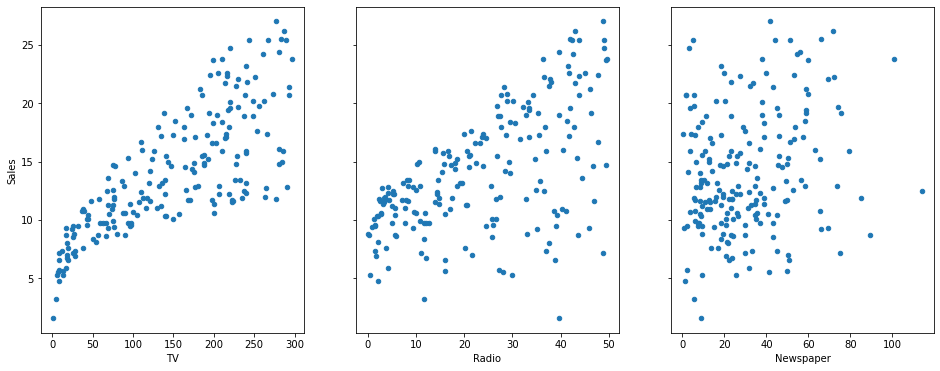

In [72]:
fig, axes = plt.subplots(1,3,sharey = True)
#figure, axes array = plt.subplots(rows, cols, share-x-axis = t/f, share-y-axis = t/f)
# the subplots() function returns the 'figure' which consists of 'rows' rows
# and 'cols' columns. This figure could be used as a base to plot the data points
#in 'data' dataframe

##data.plot(kind, x-axis variable, y-axis-variable, axis on which to plot figure size)
data.plot(kind = 'scatter', x='TV', y='Sales', ax = axes[0], figsize = (16,6))
data.plot(kind = 'scatter', x='Radio', y='Sales', ax = axes[1], figsize = (16,6))

## (OR)
## data.plot.scatter(x-axis variable, y-axis-variable, axis on which to plot figure size)
data.plot.scatter(x='Newspaper', y='Sales', ax = axes[2], figsize = (16,6))


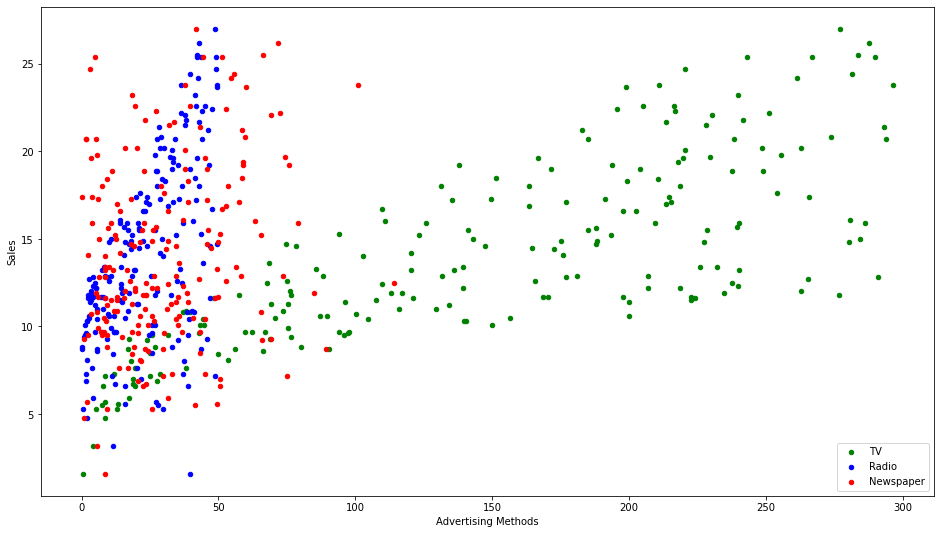

In [78]:
fig, axes = plt.subplots(1,1)
data.plot.scatter(x = 'TV', y = 'Sales', ax = axes, figsize = (16,9), color = 'green',label = "TV")
data.plot.scatter(x = 'Radio', y = 'Sales', ax = axes, figsize = (16,9), color = 'blue',label = "Radio")
data.plot.scatter(x = 'Newspaper', y = 'Sales', ax = axes, figsize = (16,9), color = 'red',label = "Newspaper")


## display legends
plt.legend()
plt.xlabel('Advertising Methods')

plt.show()

In [79]:
# Is there a relationship between ads and sales?
# YES

### Using Linear Regression to estimate the relationship between the sales and each advertising mthods

In [89]:
feature_col = ['TV']
#independent Variable
x = data[feature_col]
y = data[['Sales']]     # dataframe
## (OR)
y = data.Sales          # array (pandas series - 1D array)

In [81]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [87]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [88]:
type(y)

pandas.core.frame.DataFrame

In [90]:
type(y)

pandas.core.series.Series

### importing Linear Regression model from sklearn

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [92]:
#fitting the model into x and y
lm.fit(x,y)

LinearRegression()

In [93]:
## Printing intercept and the slope of the regresion model developed
print(lm.intercept_, lm.coef_)


#coef is the slope of each independent variable on consideration

7.032593549127693 [0.04753664]


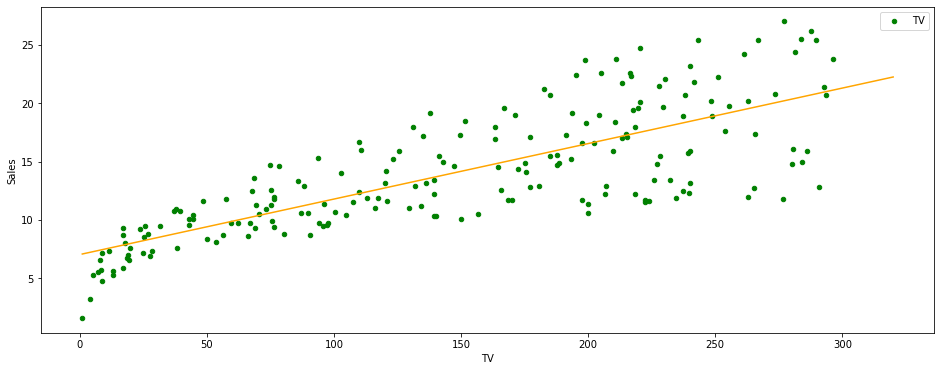

In [99]:
data.plot.scatter(x = 'TV', y='Sales', label = 'TV', color = 'green', figsize= (16,6))
x = np.linspace(1, 320)
y = 0.04753664*x + 7.032593549127693 
plt.plot(x, y, color='orange', label="LR prediction")

### Trying to make a random prdiction for a value

In [106]:
X_new = pd.DataFrame({'TV':[50,60],'Newspaper':[23,56],'Radio':[80,67]})
X_new

,TV,Newspaper,Radio
0,50,23,80
1,60,56,67


In [109]:
lm.predict(X_new[['TV']])

array([9.40942557, 9.88479198])

### Building a multi-variable Linear Regression model

In [114]:
feature_cols = ['TV','Radio','Newspaper']
x = data[feature_cols]
y = data[['Sales']]

In [116]:
#To split train and test data
from sklearn import model_selection

In [118]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.3, random_state = 35)

In [123]:
lm.fit(x_train,y_train)

LinearRegression()

In [124]:
pred = lm.predict(x_test)

In [128]:
### printing RMSE
print(sqrt(mean_squared_error(y_test, pred)))

1.9072064031410867
